In [1]:
%%HTML
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

# load data

In [3]:
# random DCT
history_dict = {}
for α in [0.05, 0.075, 0.09, 0.1, 0.15]:
    alpha_string = "{0:.3f}".format(α)[:].replace(".", "p")
    with open("time_evolution_random_dct_manytimes_alpha" + alpha_string + ".pickle", "rb") as f:
        history_dict[α] = pickle.load(f)
        print(history_dict[α].shape)
    
# riboflavin
with open("time_evolution_riboflavin.pickle", "rb") as f:
    riboflavin_history = pickle.load(f)

(10, 200)
(10, 200)
(10, 200)
(10, 200)
(10, 200)


# plot figure

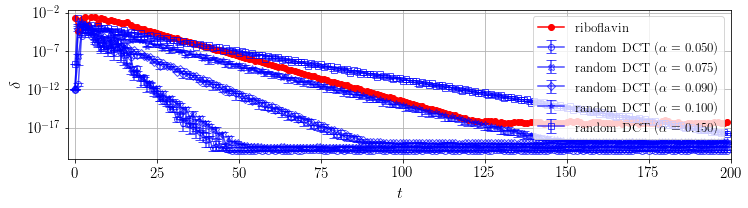

In [4]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

t_min = -2
t_max = 200
fig = plt.figure(figsize=(14*0.75, 4*0.75))

ax = fig.add_subplot(111)
for marker, α in zip(["o", "X", "D", "*", "s"], [0.05, 0.075, 0.09, 0.1, 0.15]):
# for marker, α in zip(["X", "D", "*", "s"], [0.075, 0.09, 0.1, 0.15]):
    history_array = history_dict[α]
    alpha_string = "{0:.3f}".format(α)
    ax.errorbar(x=np.arange(history_array.shape[1]),
               y=history_array.mean(axis=0),
               yerr=history_array.std(axis=0)/np.sqrt(history_array.shape[0]),
                capsize=5,
               marker=marker, c="b", ms=8*0.75, alpha=0.7, label=r"random DCT $(\alpha={})$".format(alpha_string),
                fillstyle="none"
               )

# ax.plot(riboflavin_history[:t_max], "-o", fillstyle="none", ms=8*0.75 ,c="r", alpha=1.0, label="riboflavin")
ax.plot(riboflavin_history[:t_max], "-o", ms=8*0.75 ,c="r", alpha=1.0, label="riboflavin")


ax.grid()
ax.set_xlabel("$t$", fontsize=22*0.75)
ax.set_ylabel("$\delta$", fontsize=22*0.75)
ax.set_yscale("log")
ax.set_xlim(t_min, t_max)
ax.tick_params(labelsize=20*0.75)
ax.legend(fontsize=17.5*0.75)

fig.tight_layout()
fig.savefig("time_evolution_transparent.png", dpi=120, transparent=True)
fig.savefig("time_evolution.png", dpi=120, transparent=False)
